<a href="https://colab.research.google.com/github/Reem-KR/GEOL-558_-Unsupervised_Learning_Project/blob/main/Log_Data_Analysis_Unsupervised_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Log Data Analysis

Reem Alrowaished

January 16 2025

## Introduction:

In this unsupervised learning project, I aim to explore the relationships between various well log measurements such as Gamma Ray, Density, Resistivity, and Caliper and others to identify patterns, clusters, and anomalies. Hopefully this will help me uncover hidden patterns or regions with similar geological properties that could help in targeting exploration efforts more efficiently.



## Section 1: Data Cleaning and Overview

In [119]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Import the Dataset file from Github
url = "https://raw.githubusercontent.com/Reem-KR/GEOL-558_-Unsupervised_Learning_Project/main/Kansas_Geological_Survey_log.csv"

# Read the CSV file from GitHub and create a dataframe
original_data = pd.read_csv(url)

# Show the first 5 rows
original_data.head(5)

,Depth,RxoRt,RLL3,SP,RILD,MN,MI,MCAL,DCAL,RHOB,RHOC,DPOR,CNLS,GR
0,195.0,226.0848,0.4076,69.8953,132.5052,-0.3548,0.1863,5.1090,1.8878,1.6973,-0.6303,59.2216,30.0657,60.4576
1,195.5,223.5031,0.4063,69.2303,123.6225,-0.3619,0.1867,5.1031,1.8882,1.6791,-0.6409,60.2877,26.7625,54.1495
2,196.0,221.4560,0.4047,68.4478,116.9258,-0.3668,0.1860,5.0872,1.8878,1.6585,-0.6539,61.4914,27.6017,51.9944
3,196.5,219.8248,0.4033,67.4843,111.7925,-0.3613,0.1867,5.0881,1.8884,1.6435,-0.6649,62.3711,31.5870,52.9645
4,197.0,218.1438,0.4023,66.3013,106.7821,-0.3569,0.1870,5.0972,1.8883,1.6390,-0.6705,62.6343,35.8251,54.9659


In [19]:
# Check the number of rows and columns of the dataframe
rows, columns = original_data.shape

# Print the number of rows and columns
print(f'The number of rows is: {rows}')
print(f'The number of columns is: {columns}')

The number of rows is: 8739
The number of columns is: 14


In [9]:
# Check for missing data in the entire dataset
missing_data = original_data.isnull().sum()
missing_data

,0
Depth,0
RxoRt,0
RLL3,0
SP,0
RILD,0
MN,0
MI,0
MCAL,0
DCAL,0
RHOB,0


In [4]:
# Information of the dataset
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8739 entries, 0 to 8738
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Depth   8739 non-null   float64
 1   RxoRt   8739 non-null   float64
 2   RLL3    8739 non-null   float64
 3   SP      8739 non-null   float64
 4   RILD    8739 non-null   float64
 5   MN      8739 non-null   float64
 6   MI      8739 non-null   float64
 7   MCAL    8739 non-null   float64
 8   DCAL    8739 non-null   float64
 9   RHOB    8739 non-null   float64
 10  RHOC    8739 non-null   float64
 11  DPOR    8739 non-null   float64
 12  CNLS    8739 non-null   float64
 13  GR      8739 non-null   float64
dtypes: float64(14)
memory usage: 956.0 KB


In [10]:
# Understanding the dataset
original_data.describe()

,Depth,RxoRt,RLL3,SP,RILD,MN,MI,MCAL,DCAL,RHOB,RHOC,DPOR,CNLS,GR
count,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.00000,8739.000000,8739.0000,8739.000000,8739.000000
mean,2535.727372,-18.493591,37.948919,-94.299762,34.511874,11.714442,12.180632,5.906369,3.669944,2.03364,0.126320,39.5532,20.129247,76.948923
std,1358.246302,31.420924,81.734581,39.652558,251.238360,27.537012,28.874862,1.305561,2.748873,0.41571,0.103907,24.3105,11.427909,33.859411
min,195.000000,-150.821900,0.389900,-201.623000,0.210400,-0.527400,-0.673500,5.047400,1.885300,1.19050,-0.670500,-1.8873,-0.513900,0.005800
25%,1292.250000,-31.993950,6.430800,-131.421100,4.356500,0.306700,0.097650,5.089800,1.919350,1.68905,0.049600,14.8416,8.888250,52.336950
50%,2623.500000,-16.509300,12.138400,-95.587500,7.822900,0.970300,0.361700,5.098500,1.977500,2.00030,0.109800,41.5051,21.053800,77.034000
75%,3715.750000,-5.941450,25.696300,-58.054000,19.486800,7.978100,7.307150,7.764550,7.850000,2.45620,0.210100,59.7036,29.544100,96.306700
max,4808.000000,247.583200,880.859400,69.895300,11510.641600,252.124200,234.871500,10.308600,12.334900,2.74230,0.357500,88.8601,47.581000,404.288100


## Section 2: Visualization

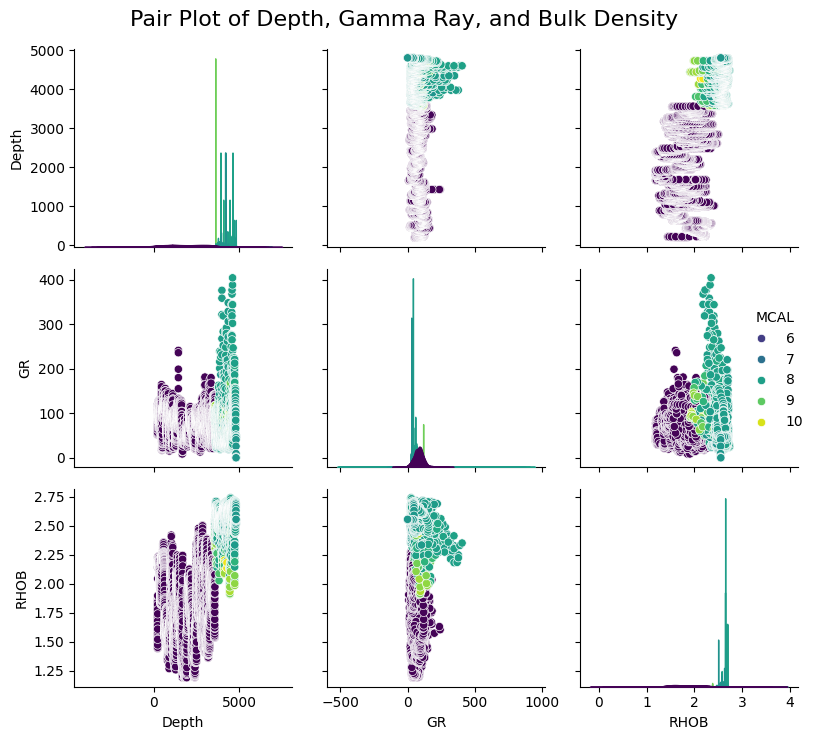

In [99]:
# Figure 1:

# Create a pair plot for selected columns to show the realtionsip between depth, bulk density, and Gamma Ray
sns.pairplot(
    original_data,
    vars=['Depth','GR','RHOB'],       # Data columns to include
    hue= 'MCAL',                      # Color the points by Caliper data
    palette='viridis'                 # Specify color palette
)

# Add title
plt.suptitle('Pair Plot of Depth, Gamma Ray, and Bulk Density', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

In [58]:
# Check the minimum and maximum of MCAL

print(original_data['MCAL'].min())
print(original_data['MCAL'].max())

5.0474
10.3086


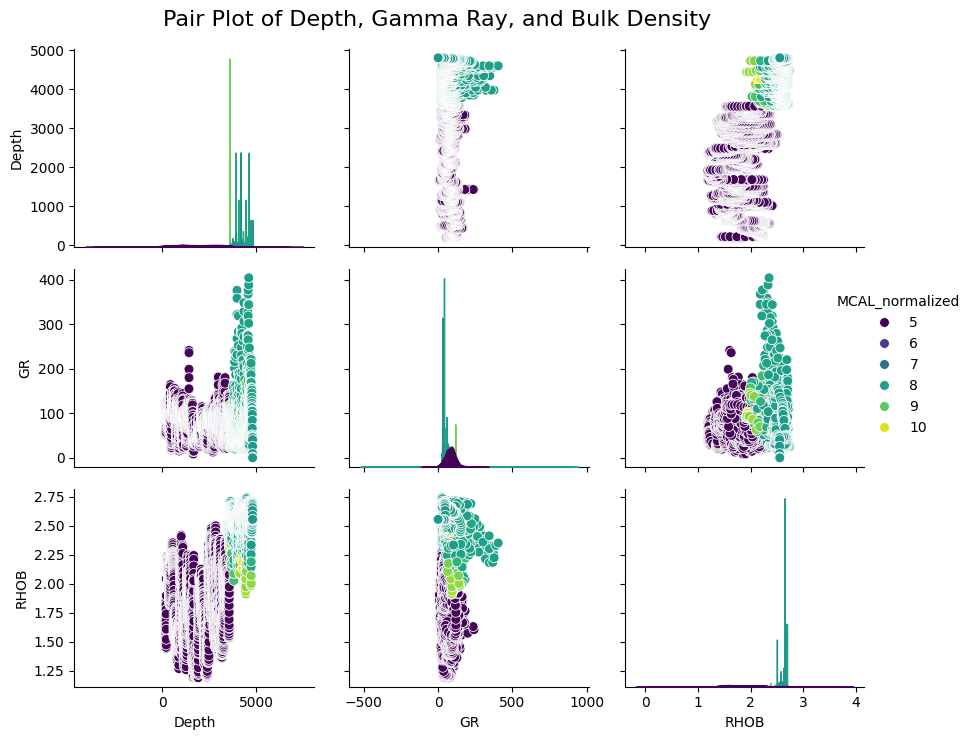

In [100]:
# Figure 1 Edited:

# I will normalize MCAL values to start from 5, since without normalization, the color scale starts at 6, while the data starts at 5 and the mean value is 5.9

from sklearn.preprocessing import MinMaxScaler
from matplotlib import colors

# Normalize MCAL to start from 5
scaler = MinMaxScaler(feature_range=(5, original_data['MCAL'].max()))  # Scale between 5 and max MCAL value
original_data['MCAL_normalized'] = scaler.fit_transform(original_data[['MCAL']])

# Create the pair plot with hue set to MCAL_normalized
grid = sns.pairplot(
    original_data,
    vars=['Depth', 'GR', 'RHOB'],         # Data columns to include
    hue='MCAL_normalized',                # Use the normalized MCAL values for hue
    palette='viridis',                    # Specify the color palette
    plot_kws={'s': 50},                   # Adjust the size of the points
    height=2.5,                           # Adjust the size of each plot

)

# Add a title
plt.suptitle('Pair Plot of Depth, Gamma Ray, and Bulk Density', fontsize=16)

# Manually control the legend's position to move it to the right more
grid._legend.set_bbox_to_anchor((1.1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()

**Figure 1 edited:**

The Seaborn pair plot visualizes the relationships between three variables in  my dataset, which includes Depth value , Gamma Ray log (GR), and Bulk Density log(RHOB). The plot is color-coded based on the normalized values of the caliper log (MCAL), which provides an additional way to understand the borehole size in relation to these other variables. This helps us visuilze if the readings are accurate or can they be an anaomoly due to any washouts.



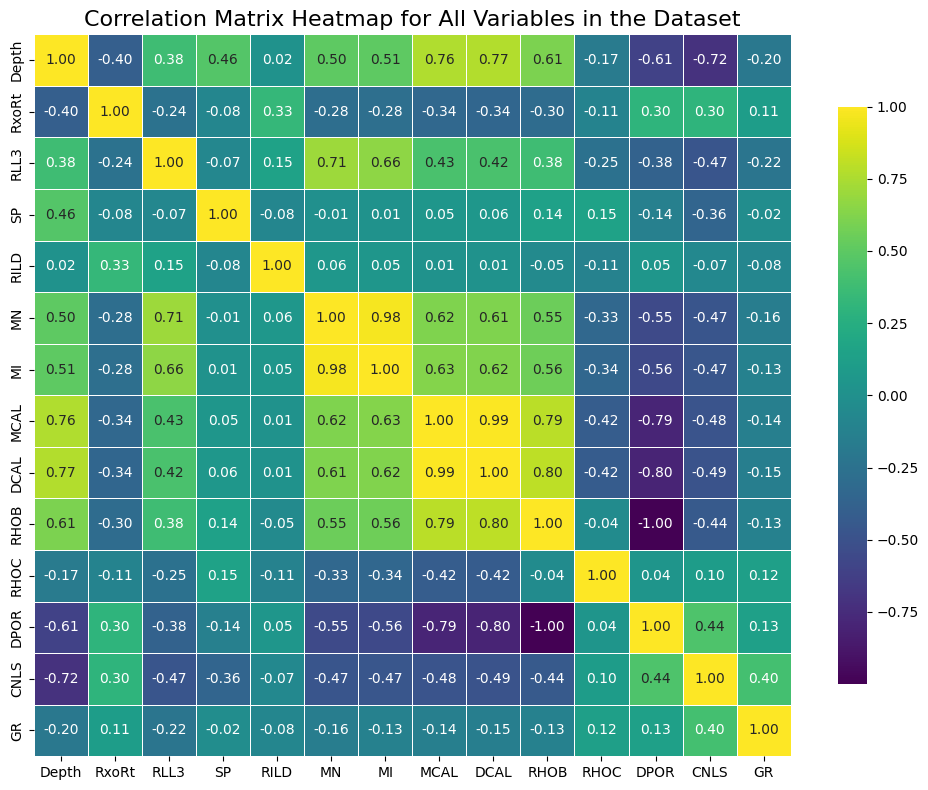

In [96]:
# Figure 2:

# Calculate the correlation matrix for the entire dataset but dropping the 'MCAL_normalized' column created in the previous step
correlation_matrix = original_data.drop(columns=['MCAL_normalized']).corr()  # Excluded MCAL_normalized

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,                # Annotate each cell with the numeric value
            cmap='viridis',            # Specify the Color palette
            fmt='.2f',                 # Format the numbers to two decimal places
            linewidths=0.5,            # Line width between the cells
            cbar_kws={'shrink': 0.8})  # Adjust color bar size

# Add a title
plt.title('Correlation Matrix Heatmap for All Variables in the Dataset', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

**Figure 2:**

The plot shows the correlation matrix heatmap for my entire dataset. We can see that there is a:

1- Strong positive correlations: Between Depth and MCAL (Normal caliper), and between MN (Resistivity wide array) and MI (Resistivity Intermediate Array).

2- Strong negative correlations: Between MCAL and DPOR (Density Porosity), and RHOB (Bulk Density) and DPOR.

3- Moderate correlations: Between variables such as DCAL (Differential Caliper)and RHOB, and RxoRt (Ratio of Shallow and deep resistivity in well) and RLL3 (Laterlog 3 data).

4- Weak or no correlations: Between variables like SP (spontaneous data) and GR, and RILD (Deep Induction resistivity data) and GR.


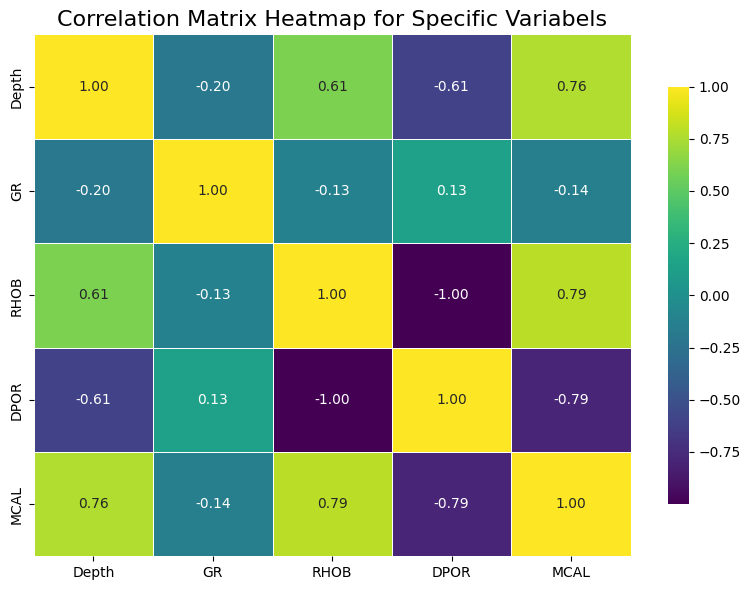

In [102]:
# Figure 3:

# Calculate the correlation matrix for specific variables
correlation_matrix = original_data[['Depth', 'GR', 'RHOB', 'DPOR', 'MCAL']].corr()  # Select the columns you want to include

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))  # Adjust the figure size
sns.heatmap(correlation_matrix,
            annot=True,                 # Annotate each cell with the numeric value
            cmap='viridis',             # Specify the Color palette
            fmt='.2f',                  # Format the numbers to two decimal places
            linewidths=0.5,             # Line width between the cells
            cbar_kws={'shrink': 0.8})   # Adjust color bar size

# Add a title
plt.title('Correlation Matrix Heatmap for Specific Variabels', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


**Figure 3:**

The plot shows the correlation matrix heatmapfor a selected set of variables, which include Depth, Gamma Ray (GR), Bulk Density (RHOB), Density Porosity (DPOR), and Normal Caliper (MCAL).  We can see that there is a:

1- Strong Positive Correlations between Depth and MCAL and MCAL and RHOB.

2- Strong Negative Correlations between DPOR and RHOB and Depth and DPOR.

3- Moderate to weak Correlations between GR and Depth,  GR and MCAL, GR and RHOB, GR and DPOR, and MCAL and DPOR.


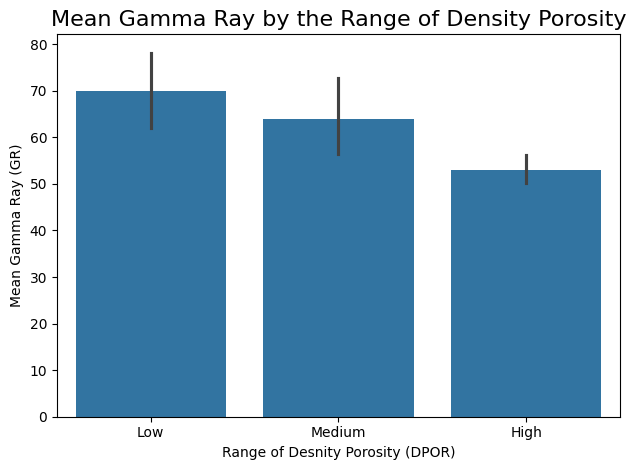

In [110]:
# Figure 4:

# Bar Plot

# Create new column to categorized DPOR into  low, medium, and high
# Adjust the bins based on the distribution of DPOR my data
original_data['DPOR_category'] = pd.cut(original_data['DPOR'], bins=[0, 1.5, 2, 3], labels=['Low', 'Medium', 'High'])

# Create a bar plot to compare the mean Gamma Ray (GR) across different DPOR categories
sns.barplot(x='DPOR_category', y='GR', data=original_data)

# Add a title and labels
plt.title('Mean Gamma Ray by the Range of Density Porosity', fontsize=16)
plt.xlabel('Range of Desnity Porosity (DPOR)')
plt.ylabel('Mean Gamma Ray (GR)')

# Show the plot
plt.tight_layout()
plt.show()

**Figure 4:**

This bar plot shows the mean Gamma Ray (GR) values for different ranges of Density Porosity (DPOR) categorized into Low, Medium, and High. The vertical lines extending from the tops of the bars represent the standard error of the mean for the mean GR values, showing the uncertainty around the mean estimate. We can see that there is an inverse relationship between Density Porosity, where higher DPOR values tend to have lower GR values, and lower DPOR values tend to have higher GR values. This makes sense since Lower GR can be an indication of Sand which is known to have higher porosity.


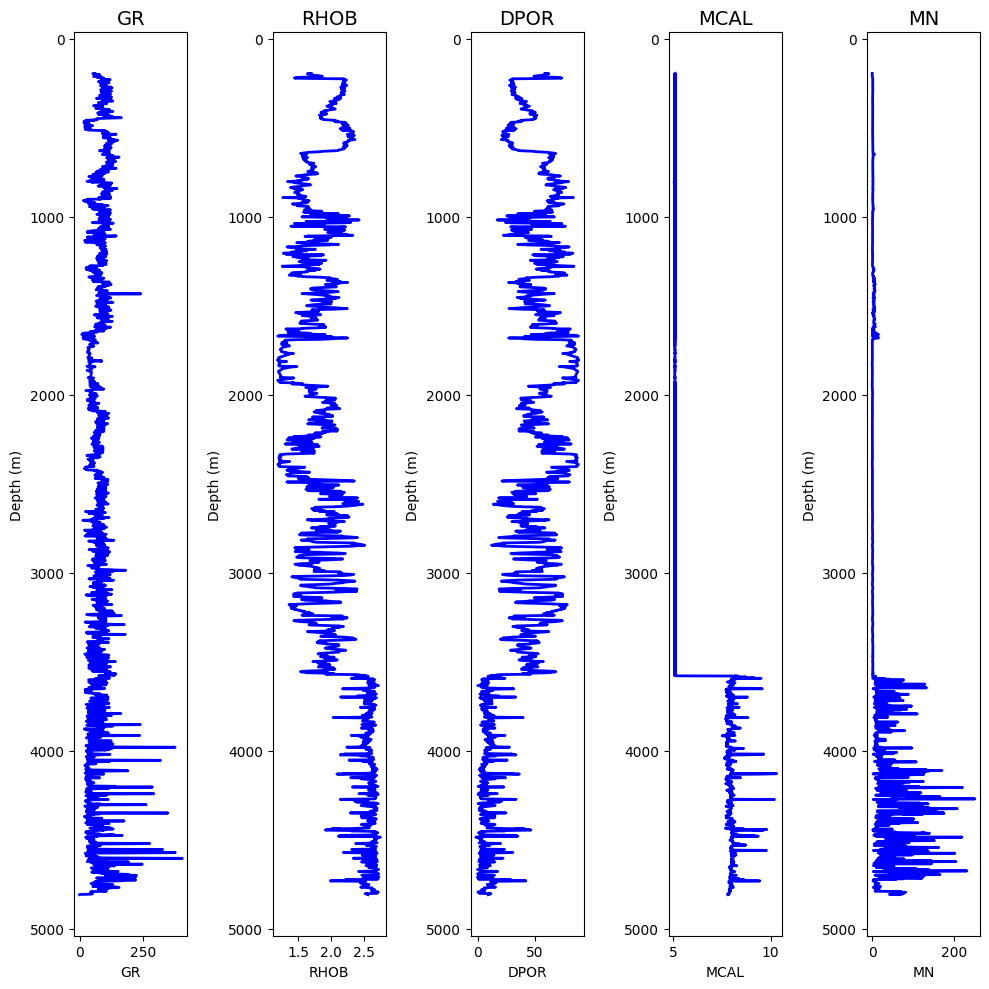

In [127]:
# Figure 5:

# Plottingt the Logs

# Specify the well logs to plot
well_logs = ['GR', 'RHOB', 'DPOR', 'MCAL', 'MN']

# Create a figure with multiple subplots
fig, axes = plt.subplots(1,5, figsize=(10, 10))

# Iterate over each log and create a subplot
for i, log in enumerate(well_logs):
    axes[i].plot(original_data[log], original_data['Depth'], label=log, color='blue', linewidth=2)
    axes[i].invert_yaxis()  # Invert Y-axis for depth increasing downward
    axes[i].set_xlabel(log)
    axes[i].set_ylabel('Depth (m)')
    axes[i].set_title(f'{log}', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


**Figure 5:**

The figure above shows us a visualization of the Gamma Ray (GR), Bulk Desnity (RHOB), Desnity Porosity (DPOR), Normal Caliper (MCAL), and Resistivity (MN) logs in respect to depth.

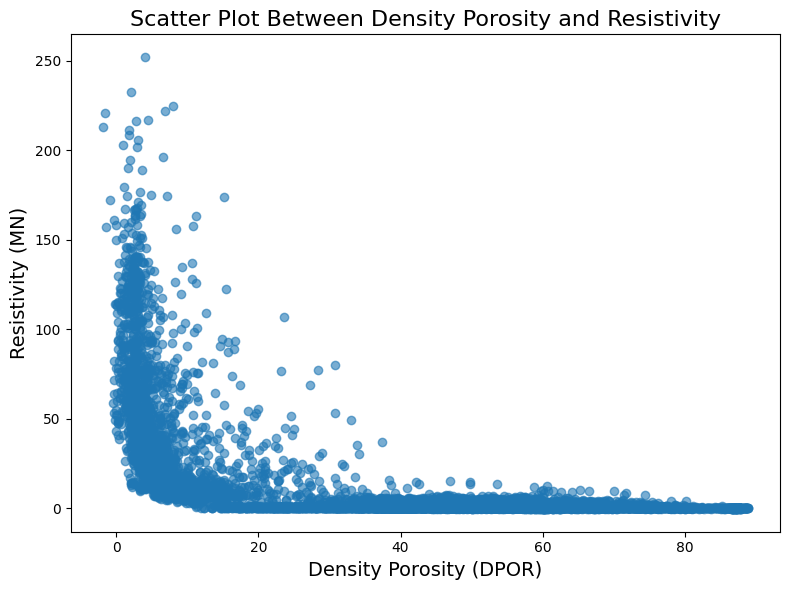

In [133]:
# Figure 6:

# Scatter plot between Desnity Porosity (DPOR) and Resistivity (MN)
plt.figure(figsize=(8, 6))

# Plot the scatter plot
plt.scatter(original_data['DPOR'], original_data['MN'], alpha=0.6)

# Add titles and labels
plt.title('Scatter Plot Between Density Porosity and Resistivity', fontsize=16)
plt.xlabel('Density Porosity (DPOR)', fontsize=14)
plt.ylabel('Resistivity (MN)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

**Figure 6:**

The scatter plot shows the relationship between Density Porosity (DPOR) and Resistivity (MN). The plot indicates that Resistivity decreases as the Density Porosity (DPOR) increases, with most data points clustering at lower DPOR values and showing higher Resistivity values. This suggests that higher porosity in the dataset may be associated with water-saturated formations, which is typically less desirable in terms of hydrocarbon potential.